In [1]:
# import from skimage
from skimage.color import rgb2gray
from skimage.filters import sobel, sobel_h, sobel_v, prewitt, roberts, gaussian
from skimage.feature import canny
import skimage.io as io
import cv2 as cv

from scipy.spatial import distance as dist

# import from matplotlib
import matplotlib.pyplot as plt

# import from numpy
import numpy as np

# import utils
from utils.commonfunctions import *

In [2]:
# img = io.imread("datasets/dataset_module1/01.jpg")

# read image 1.jpg
img = cv.imread('dataset/inputs/Five0.png',0)
# colored_img = cv.imread('datasets/dataset_module1/01.jpg')
# img = cv.imread('datasets/dataset_module1/11.jpg',0)

# convert to greyscale
grey_scale = img
# blurredImg = img
# blurredImg =  cv.medianBlur(img,7)
blurredImg = cv.GaussianBlur(img,(5,5),0)
# blurredImg = gaussian(img,sigma = 2)

print(img.shape)

(843, 610)


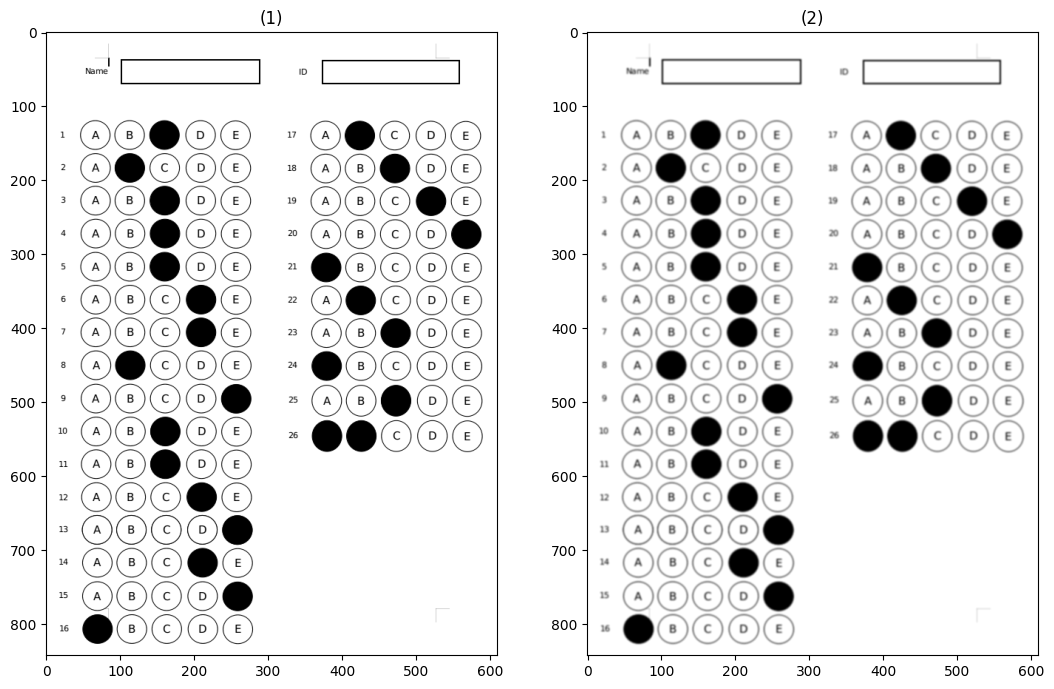

In [3]:
show_images([img,blurredImg])

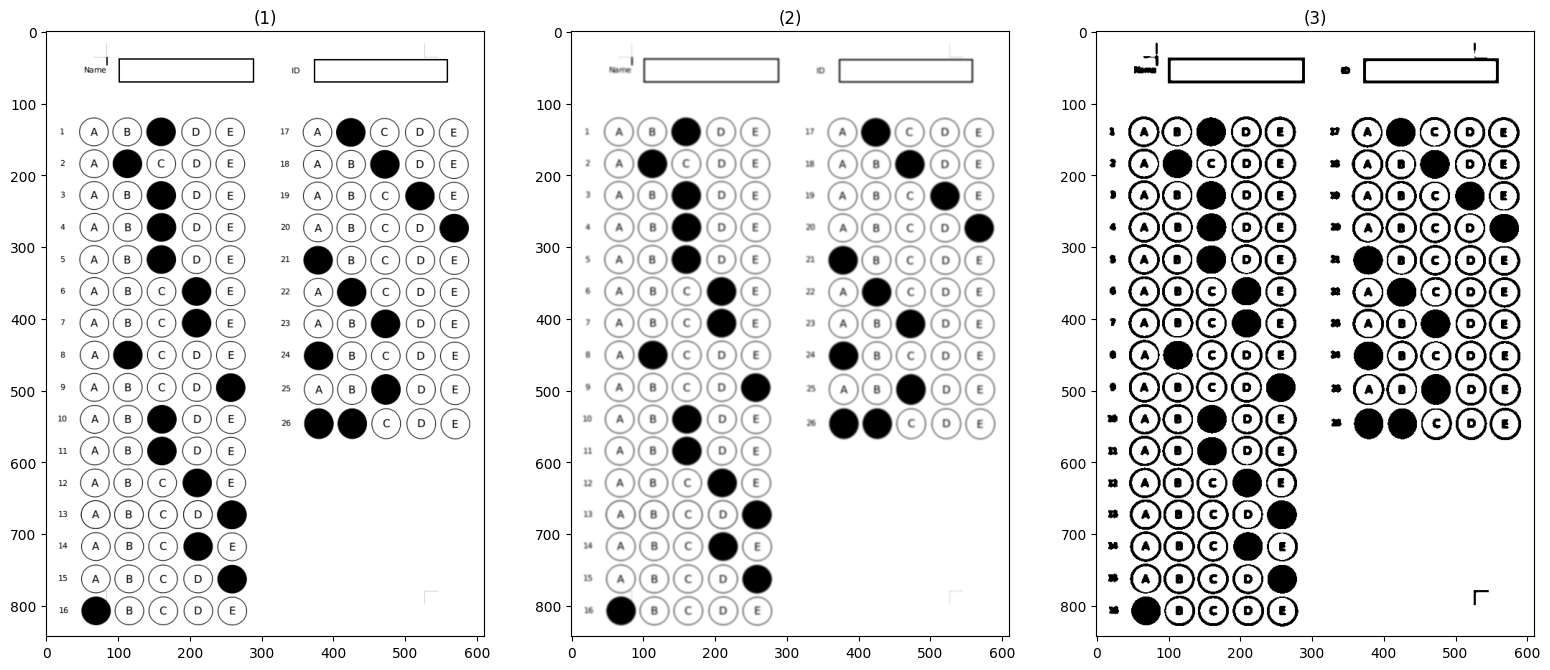

In [4]:
binaryImg = cv.adaptiveThreshold(blurredImg,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,59,3)
# ret,binaryImg = cv.threshold(blurredImg,147,255,cv.THRESH_BINARY)
show_images([img,blurredImg,binaryImg])

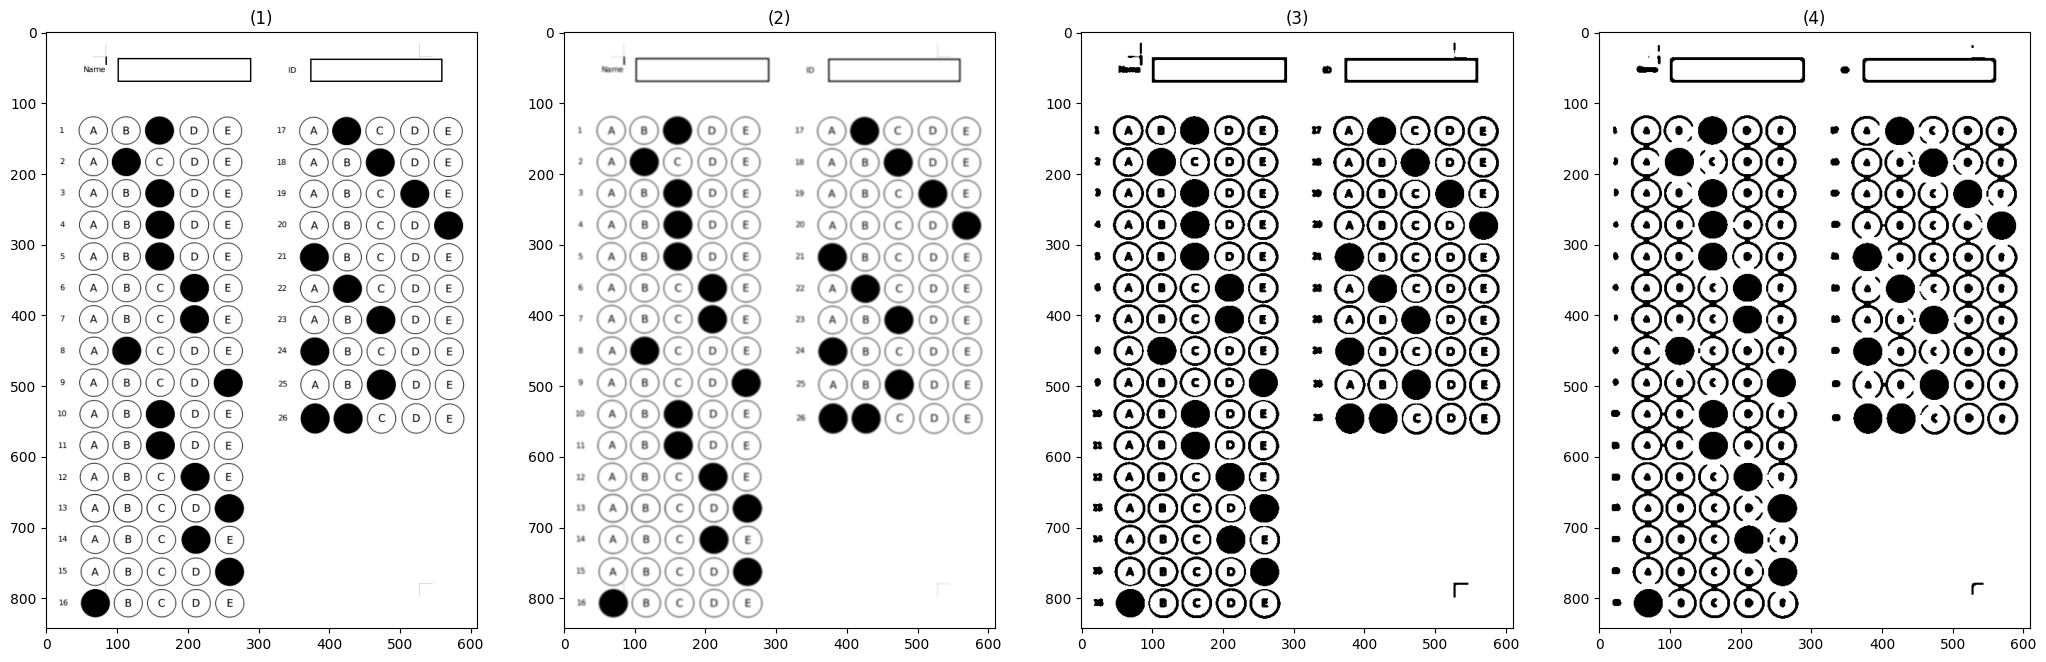

In [5]:
median =  cv.medianBlur(binaryImg,5)
median =  cv.medianBlur(median,5)
show_images([img,blurredImg,binaryImg,median])

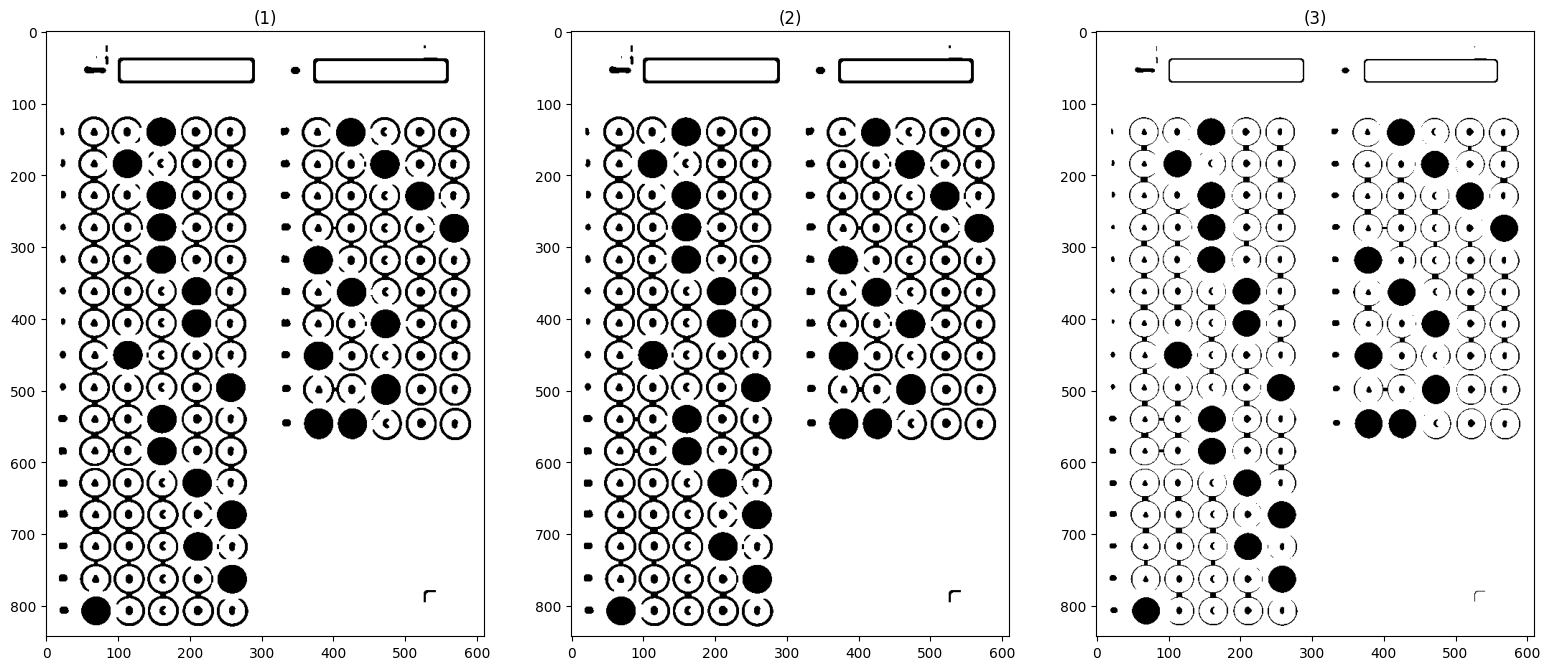

In [6]:
kernel = np.ones((3,3))
openingImg = opening(median, kernel)
dilatedImg = dilate(openingImg, kernel)
show_images([median,openingImg,dilatedImg])

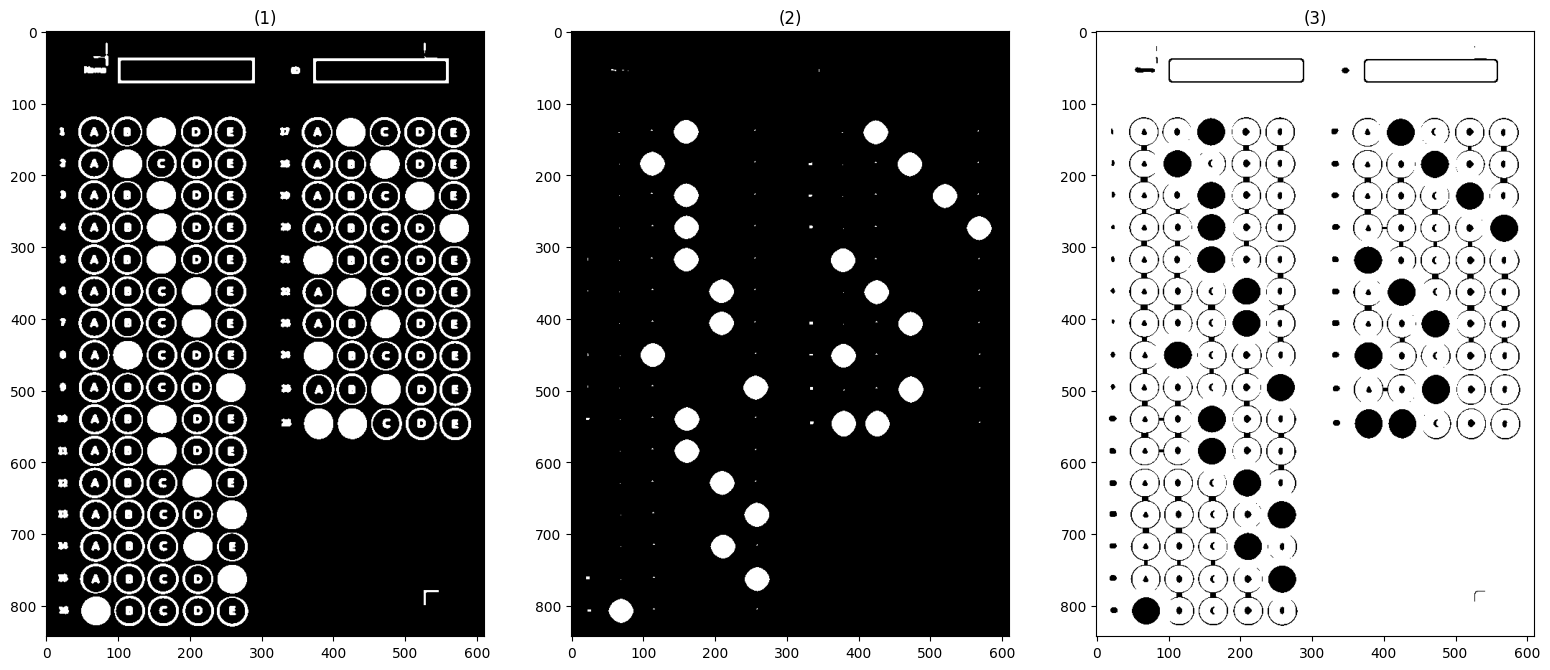

In [7]:
negativeImg = 255-binaryImg
kernel = np.ones((7,7))
erodedImg = erode(negativeImg, kernel)
show_images([negativeImg,erodedImg,dilatedImg])

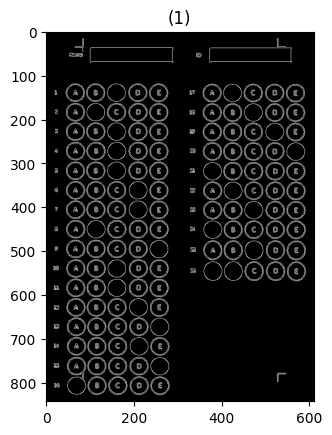

In [8]:
# use canny to detect edges
cannyEdges = cannyEdge(img)

show_images([cannyEdges])

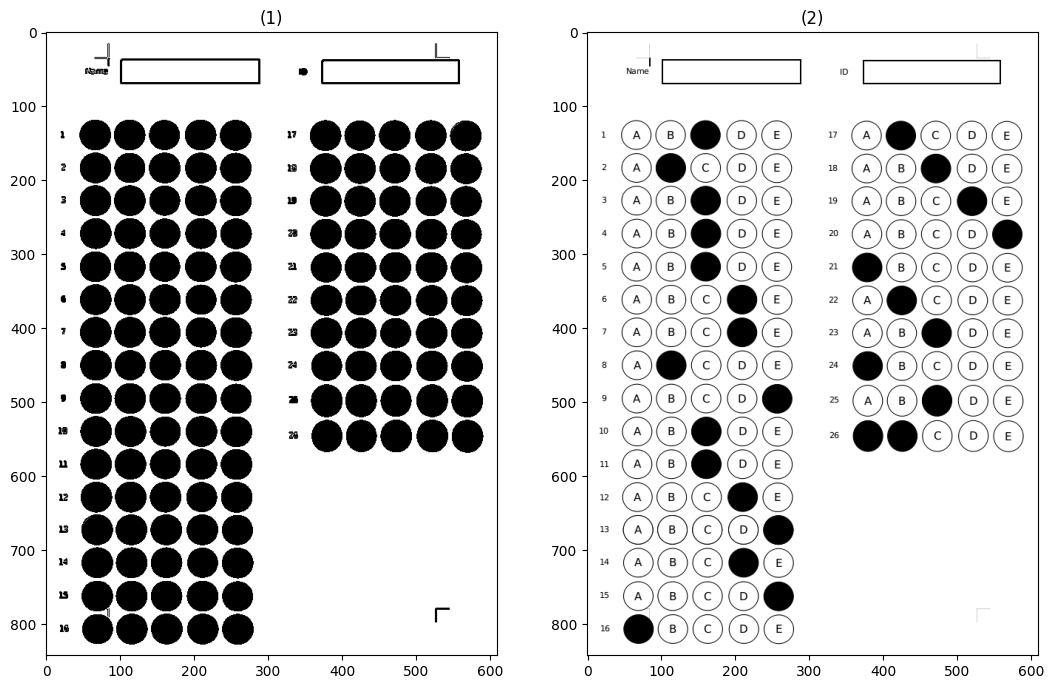

In [11]:
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
img_cpy = img.copy()
contours, hierarchy = cv.findContours(cannyEdges, 
    cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
# cv.drawContours(img_cpy, contours, -1, (0, 255, 0), 3)

sorted_contours = sorted(contours, key=cv.contourArea)
# print(sorted_contours)
for contour in sorted_contours:
    cv.fillPoly(img_cpy, pts =[contour], color=(0,0,0))
show_images([img_cpy,img])

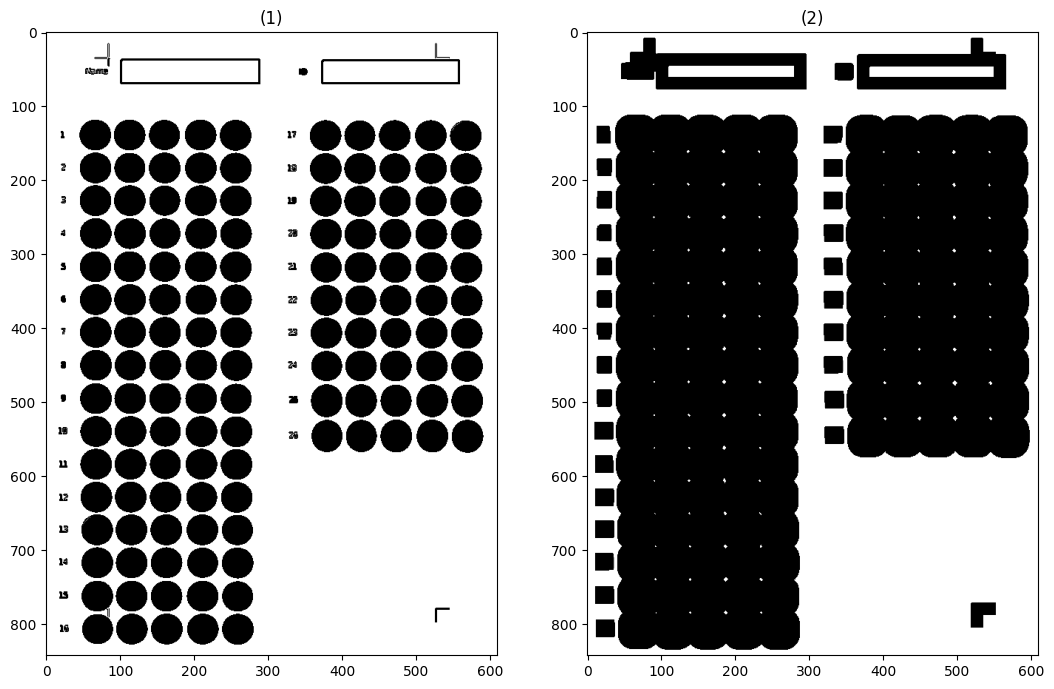

In [13]:
kernel = np.ones((15,15))
erodedImg = erode(img_cpy, kernel)
show_images([img_cpy,erodedImg])